In [ ]:
# !pip install matplotlib

In [1]:
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
x1=np.random.randint(1,30,200000)
x2=np.random.randint(1,30,200000)

y=4+2*x1+3*x2+3*np.random.random(200000)

In [3]:
w=np.random.random(3)

In [4]:
x=pd.DataFrame({'const':np.ones(200000),'x1':x1,'x2':x2})

In [5]:
y.shape

(200000,)

In [6]:
x.shape

(200000, 3)

In [7]:
w.shape

(3,)

## Estimated paramter values from sklearn

In [8]:
lr=LinearRegression()
lr.fit(x.iloc[:,1:],y)

LinearRegression()

In [9]:
w_sklearn=[lr.intercept_]+list(lr.coef_)
w_sklearn

[5.500373972955103, 1.9999892498443652, 3.000170620381406]

## Paramter Estimation with Gradient Descent

In [10]:
def mypred(features,weights):
    
    preds=np.dot(features,weights)
    return(preds)

In [13]:
mypred(x,w).shape

(200000,)

In [12]:
y

array([ 79.89882224, 121.12542608, 106.9908451 , ..., 144.76866422,
        15.10775118, 123.14337644])

In [14]:
def myerror(target,features,weights):
    
    preds=mypred(features,weights)
    errors=target-preds
    return(errors)

In [15]:
myerror(y,x,w)

array([ 71.65755208, 108.27709911,  98.16366942, ..., 130.62664066,
        13.60724627, 109.32281684])

In [16]:
def mycost(target,features,weights):
    
    errors=myerror(target,features,weights)
    
    cost=np.dot(errors.T,errors)
    
    return(cost)

In [17]:
mycost(y,x,w)

1201353485.069045

In [24]:
def gradient(target,features,weights):
    
    errors=myerror(target,features,weights)
    grad=-np.dot(features.T,errors)/features.shape[0]
    
    return(grad)


In [25]:
gradient(y,x,w)

array([  -72.39795206, -1198.30683612, -1286.12517915])

In [26]:
def my_lr_gd(target,features,learning_rate,num_steps):
    
    weights=np.random.random(features.shape[1])
    cost=[]
    
    for i in range(num_steps):
        
        weights -= learning_rate*gradient(target,features,weights)
#         weights = weights-  learning_rate*gradient(target,features,weights)
        
        cost.append(mycost(target,features,weights))
    return(cost,weights)

In [37]:
cost_gd,w_gd= my_lr_gd(y,x,.001,1000)

In [38]:
w_gd

array([1.18141786, 2.12487777, 3.12472078])

In [40]:
w_sklearn/w_gd

array([4.65573964, 0.94122555, 0.96014039])

<Axes: >

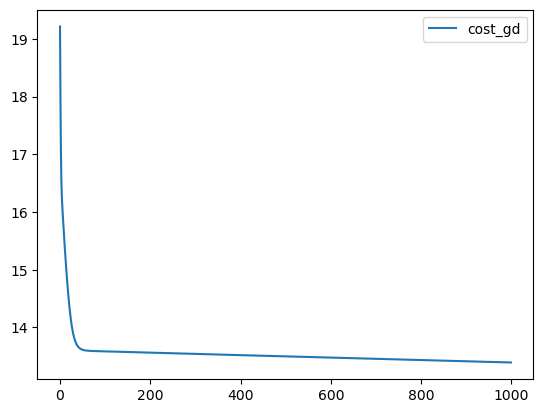

In [41]:
np.log(pd.DataFrame({'cost_gd':cost_gd})).plot()

In [42]:
def my_lr_sgd(target,features,learning_rate,num_steps):
    cost=[]
    weights=np.random.random(features.shape[1])
    
    for i in np.arange(num_steps):
        
        rand_ind=np.random.choice(range(features.shape[0]),10)
        
        target_sub=target[rand_ind]
        
        features_sub=features.iloc[rand_ind,:]
        
        weights -= learning_rate*gradient(target_sub,features_sub,weights)
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [43]:
cost_sgd,w_sgd=my_lr_sgd(y,x,.001,1000)

In [44]:
w_sgd

array([1.53054837, 2.11442071, 3.11294684])

In [45]:
w_sklearn/w_sgd

array([3.59372763, 0.94588047, 0.96377188])

<Axes: >

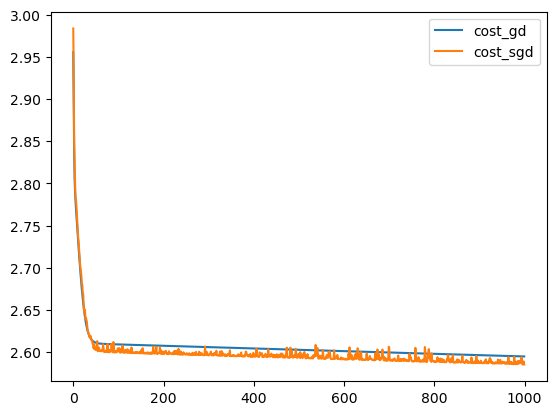

In [46]:
np.log(pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd)})).plot()

In [ ]:
def my_lr_mom(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    vw=np.zeros(features.shape[1])
    gamma=0.9
    
    for i in np.arange(num_steps):
        
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        vw=gamma*vw+(1-gamma)*gradient(target_sub,features_sub,weights)
        
        vw_a=vw/(1-gamma**(i+1))
        
        weights -= learning_rate*vw_a
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [ ]:
cost_mom,w_mom=my_lr_mom(y,x,.01,1000)

In [ ]:
w_mom

In [ ]:
w_sklearn

In [ ]:
w_sklearn/w_mom

In [ ]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom})).plot()

In [ ]:
def my_lr_rms(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    sw=np.zeros(features.shape[1])
    
    gamma=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        
        sw=gamma*sw+(1-gamma)*(gd**2)
        
        sw_a=sw/(1-gamma**(i+1))
        
        weights -= learning_rate*(gd/(np.sqrt(sw_a)+1e-15))
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [ ]:
cost_rms,w_rms=my_lr_rms(y,x,.1,1000)

In [ ]:
w_rms

In [ ]:
w_sklearn

In [ ]:
w_sklearn/w_rms

In [ ]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms})).plot()

In [ ]:
def my_lr_adam(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    sw=np.zeros(features.shape[1])
    vw=np.zeros(features.shape[1])
    beta1=0.9
    beta2=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        
        vw=beta1*vw+(1-beta1)*gd
        
        sw=beta2*sw+(1-beta2)*(gd**2)
        
        vw_a=vw/(1-beta1**(i+1))
        sw_a=sw/(1-beta2**(i+1))
        
        weights -= learning_rate*(vw_a/(np.sqrt(sw_a)+1e-15))
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [ ]:
cost_adam,w_adam=my_lr_adam(y,x,.1,1000)

In [ ]:
w_adam

In [ ]:
w_sklearn

In [ ]:
w_sklearn/w_adam

In [ ]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms,'cost_adam':cost_adam})).plot()